<a href="https://colab.research.google.com/github/bdugick89/Data-Science-Bootcamp/blob/main/Scratch_2_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



Be sure to go through the whole data science process and document as such in your Jupyter notebook.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



# Housing Prices:
Project 2
Regression Prediction Techniques
---
Brannon Dugick - March

## Data Collection/Sources


This data comes from and S3 bucket-
https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv

DESCRIPTIVE ABSTRACT: Data set contains information from the
Assessor's Office used in computing assessed values for individual
residential properties sold from 2006 to 2010.
VARIABLE DESCRIPTIONS:

Tab characters are used to separate variables in the data file. The
data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete,
and 20 continuous variables (and 2 additional observation
identifiers).

###Create Data Dictionary as Data Frame

In [ ]:
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats


from sklearn import datasets, metrics, model_selection,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from IPython.display import Image
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
data_dictionary = {
    "Order": {"Type": "Discrete", "Description": "Observation number"},
    "PID": {"Type": "Nominal", "Description": "Parcel identification number"},
    "MS SubClass": {
        "Type": "Nominal",
        "Description": "Identifies the type of dwelling involved in the sale.",
        "Values": {
            "020": "1-STORY 1946 & NEWER ALL STYLES",
            "030": "1-STORY 1945 & OLDER",
            "040": "1-STORY W/FINISHED ATTIC ALL AGES",
            "045": "1-1/2 STORY - UNFINISHED ALL AGES",
            "050": "1-1/2 STORY FINISHED ALL AGES",
            "060": "2-STORY 1946 & NEWER",
            "070": "2-STORY 1945 & OLDER",
            "075": "2-1/2 STORY ALL AGES",
            "080": "SPLIT OR MULTI-LEVEL",
            "085": "SPLIT FOYER",
            "090": "DUPLEX - ALL STYLES AND AGES",
            "120": "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
            "150": "1-1/2 STORY PUD - ALL AGES",
            "160": "2-STORY PUD - 1946 & NEWER",
            "180": "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
            "190": "2 FAMILY CONVERSION - ALL STYLES AND AGES",
        },
    },
    "MS Zoning": {
        "Type": "Nominal",
        "Description": "Identifies the general zoning classification of the sale.",
        "Values": {
            "A": "Agriculture",
            "C": "Commercial",
            "FV": "Floating Village Residential",
            "I": "Industrial",
            "RH": "Residential High Density",
            "RL": "Residential Low Density",
            "RP": "Residential Low Density Park",
            "RM": "Residential Medium Density",
        },
    },
    "Lot Frontage": {"Type": "Continuous", "Description": "Linear feet of street connected to property"},
    "Lot Area": {"Type": "Continuous", "Description": "Lot size in square feet"},
    "Street": {
        "Type": "Nominal",
        "Description": "Type of road access to property",
        "Values": {"Grvl": "Gravel", "Pave": "Paved"},
    },
    "Alley": {
        "Type": "Nominal",
        "Description": "Type of alley access to property",
        "Values": {"Grvl": "Gravel", "Pave": "Paved", "NA": "No alley access"},
    },
    "Lot Shape": {
        "Type": "Ordinal",
        "Description": "General shape of property",
        "Values": {"Reg": "Regular", "IR1": "Slightly irregular", "IR2": "Moderately Irregular", "IR3": "Irregular"},
    },
    "Land Contour": {
        "Type": "Nominal",
        "Description": "Flatness of the property",
        "Values": {"Lvl": "Near Flat/Level", "Bnk": "Banked", "HLS": "Hillside", "Low": "Depression"},
    },
    "Utilities": {
        "Type": "Ordinal",
        "Description": "Type of utilities available",
        "Values": {
            "AllPub": "All public Utilities",
            "NoSewr": "Electricity, Gas, and Water",
            "NoSeWa": "Electricity and Gas Only",
            "ELO": "Electricity only",
        },
    },
    "Lot Config": {
        "Type": "Nominal",
        "Description": "Lot configuration",
        "Values": {"Inside": "Inside lot", "Corner": "Corner lot", "CulDSac": "Cul-de-sac", "FR2": "Frontage on 2 sides", "FR3": "Frontage on 3 sides"},
    },
    "Land Slope": {
        "Type": "Ordinal",
        "Description": "Slope of property",
        "Values": {"Gtl": "Gentle slope", "Mod": "Moderate Slope", "Sev": "Severe Slope"},
    },
}

data_dictionary.update({
    "Neighborhood": {
        "Type": "Nominal",
        "Description": "Physical locations within Ames city limits.",
        "Values": {
            "Blmngtn": "Bloomington Heights",
            "Blueste": "Bluestem",
            "BrDale": "Briardale",
            "BrkSide": "Brookside",
            "ClearCr": "Clear Creek",
            "CollgCr": "College Creek",
            "Crawfor": "Crawford",
            "Edwards": "Edwards",
            "Gilbert": "Gilbert",
            "Greens": "Greens",
            "GrnHill": "Green Hills",
            "IDOTRR": "Iowa DOT and Rail Road",
            "Landmrk": "Landmark",
            "MeadowV": "Meadow Village",
            "Mitchel": "Mitchell",
            "Names": "North Ames",
            "NoRidge": "Northridge",
            "NPkVill": "Northpark Villa",
            "NridgHt": "Northridge Heights",
            "NWAmes": "Northwest Ames",
            "OldTown": "Old Town",
            "SWISU": "South & West of Iowa State University",
            "Sawyer": "Sawyer",
            "SawyerW": "Sawyer West",
            "Somerst": "Somerset",
            "StoneBr": "Stone Brook",
            "Timber": "Timberland",
            "Veenker": "Veenker",
        },
    },
    "Condition 1": {
        "Type": "Nominal",
        "Description": "Proximity to various conditions.",
        "Values": {
            "Artery": "Adjacent to arterial street",
            "Feedr": "Adjacent to feeder street",
            "Norm": "Normal",
            "RRNn": "Within 200' of North-South Railroad",
            "RRAn": "Adjacent to North-South Railroad",
            "PosN": "Near positive off-site feature",
            "PosA": "Adjacent to positive off-site feature",
            "RRNe": "Within 200' of East-West Railroad",
            "RRAe": "Adjacent to East-West Railroad",
        },
    },
    "Condition 2": {
        "Type": "Nominal",
        "Description": "Proximity to various conditions (if more than one is present).",
        "Values": {
            "Artery": "Adjacent to arterial street",
            "Feedr": "Adjacent to feeder street",
            "Norm": "Normal",
            "RRNn": "Within 200' of North-South Railroad",
            "RRAn": "Adjacent to North-South Railroad",
            "PosN": "Near positive off-site feature",
            "PosA": "Adjacent to positive off-site feature",
            "RRNe": "Within 200' of East-West Railroad",
            "RRAe": "Adjacent to East-West Railroad",
        },
    },
    "Bldg Type": {
        "Type": "Nominal",
        "Description": "Type of dwelling.",
        "Values": {
            "1Fam": "Single-family Detached",
            "2FmCon": "Two-family Conversion",
            "Duplx": "Duplex",
            "TwnhsE": "Townhouse End Unit",
            "TwnhsI": "Townhouse Inside Unit",
        },
    },
    "House Style": {
        "Type": "Nominal",
        "Description": "Style of dwelling.",
        "Values": {
            "1Story": "One story",
            "1.5Fin": "One and one-half story: 2nd level finished",
            "1.5Unf": "One and one-half story: 2nd level unfinished",
            "2Story": "Two story",
            "2.5Fin": "Two and one-half story: 2nd level finished",
            "2.5Unf": "Two and one-half story: 2nd level unfinished",
            "SFoyer": "Split Foyer",
            "SLvl": "Split Level",
        },
    },
    "Overall Qual": {
        "Type": "Ordinal",
        "Description": "Rates the overall material and finish of the house.",
        "Values": {
            "10": "Very Excellent",
            "9": "Excellent",
            "8": "Very Good",
            "7": "Good",
            "6": "Above Average",
            "5": "Average",
            "4": "Below Average",
            "3": "Fair",
            "2": "Poor",
            "1": "Very Poor",
        },
    }
 } )
data_dictionary.update({
    "Overall Cond": {
        "Type": "Ordinal",
        "Description": "Rates the overall condition of the house",
        "Values": {
            "10": "Very Excellent",
            "9": "Excellent",
            "8": "Very Good",
            "7": "Good",
            "6": "Above Average",
            "5": "Average",
            "4": "Below Average",
            "3": "Fair",
            "2": "Poor",
            "1": "Very Poor",
        },
    },
    "Year Built": {"Type": "Discrete", "Description": "Original construction date"},
    "Year Remod/Add": {"Type": "Discrete", "Description": "Remodel date (same as construction date if no remodeling or additions)"},
    "Roof Style": {
        "Type": "Nominal",
        "Description": "Type of roof",
        "Values": {
            "Flat": "Flat",
            "Gable": "Gable",
            "Gambrel": "Gambrel (Barn)",
            "Hip": "Hip",
            "Mansard": "Mansard",
            "Shed": "Shed",
        },
    },
    "Roof Matl": {
        "Type": "Nominal",
        "Description": "Roof material",
        "Values": {
            "ClyTile": "Clay or Tile",
            "CompShg": "Standard (Composite) Shingle",
            "Membran": "Membrane",
            "Metal": "Metal",
            "Roll": "Roll",
            "Tar&Grv": "Gravel & Tar",
            "WdShake": "Wood Shakes",
            "WdShngl": "Wood Shingles",
        },
    },
    "Exterior 1": {
        "Type": "Nominal",
        "Description": "Exterior covering on house",
        "Values": {
            "AsbShng": "Asbestos Shingles",
            "AsphShn": "Asphalt Shingles",
            "BrkComm": "Brick Common",
            "BrkFace": "Brick Face",
            "CBlock": "Cinder Block",
            "CemntBd": "Cement Board",
            "HdBoard": "Hard Board",
            "ImStucc": "Imitation Stucco",
            "MetalSd": "Metal Siding",
            "Other": "Other",
            "Plywood": "Plywood",
            "PreCast": "PreCast",
            "Stone": "Stone",
            "Stucco": "Stucco",
            "VinylSd": "Vinyl Siding",
            "Wd Sdng": "Wood Siding",
            "WdShing": "Wood Shingles",
        },
    },
    "Exterior 2": {
        "Type": "Nominal",
        "Description": "Exterior covering on house (if more than one material)",
        "Values": {
            "AsbShng": "Asbestos Shingles",
            "AsphShn": "Asphalt Shingles",
            "BrkComm": "Brick Common",
            "BrkFace": "Brick Face",
            "CBlock": "Cinder Block",
            "CemntBd": "Cement Board",
            "HdBoard": "Hard Board",
            "ImStucc": "Imitation Stucco",
            "MetalSd": "Metal Siding",
            "Other": "Other",
            "Plywood": "Plywood",
            "PreCast": "PreCast",
            "Stone": "Stone",
            "Stucco": "Stucco",
            "VinylSd": "Vinyl Siding",
            "Wd Sdng": "Wood Siding",
            "WdShing": "Wood Shingles",
        },
    },
    "Mas Vnr Type": {
        "Type": "Nominal",
        "Description": "Masonry veneer type",
        "Values": {
            "BrkCmn": "Brick Common",
            "BrkFace": "Brick Face",
            "CBlock": "Cinder Block",
            "None": "None",
            "Stone": "Stone",
        },
    },
})
data_dictionary.update({
    "Mas Vnr Area": {"Type": "Continuous", "Description": "Masonry veneer area in square feet"},
    "Exter Qual": {
        "Type": "Ordinal",
        "Description": "Evaluates the quality of the material on the exterior",
        "Values": {"Ex": "Excellent", "Gd": "Good", "TA": "Average/Typical", "Fa": "Fair", "Po": "Poor"},
    },
    "Exter Cond": {
        "Type": "Ordinal",
        "Description": "Evaluates the present condition of the material on the exterior",
        "Values": {"Ex": "Excellent", "Gd": "Good", "TA": "Average/Typical", "Fa": "Fair", "Po": "Poor"},
    },
    "Foundation": {
        "Type": "Nominal",
        "Description": "Type of foundation",
        "Values": {
            "BrkTil": "Brick & Tile",
            "CBlock": "Cinder Block",
            "PConc": "Poured Concrete",
            "Slab": "Slab",
            "Stone": "Stone",
            "Wood": "Wood",
        },
    },
    "Bsmt Qual": {
        "Type": "Ordinal",
        "Description": "Evaluates the height of the basement",
        "Values": {
            "Ex": "Excellent (100+ inches)",
            "Gd": "Good (90-99 inches)",
            "TA": "Typical (80-89 inches)",
            "Fa": "Fair (70-79 inches)",
            "Po": "Poor (<70 inches)",
            "NA": "No Basement",
        },
    },
    "Bsmt Cond": {
        "Type": "Ordinal",
        "Description": "Evaluates the general condition of the basement",
        "Values": {
            "Ex": "Excellent",
            "Gd": "Good",
            "TA": "Typical - slight dampness allowed",
            "Fa": "Fair - dampness or some cracking or settling",
            "Po": "Poor - Severe cracking, settling, or wetness",
            "NA": "No Basement",
        },
    },
    "Bsmt Exposure": {
        "Type": "Ordinal",
        "Description": "Refers to walkout or garden level walls",
        "Values": {"Gd": "Good Exposure", "Av": "Average Exposure", "Mn": "Minimum Exposure", "No": "No Exposure", "NA": "No Basement"},
    },
    "BsmtFin Type 1": {
        "Type": "Ordinal",
        "Description": "Rating of basement finished area",
        "Values": {"GLQ": "Good Living Quarters", "ALQ": "Average Living Quarters", "BLQ": "Below Average Living Quarters", "Rec": "Average Rec Room", "LwQ": "Low Quality", "Unf": "Unfinished", "NA": "No Basement"},
    },
    "BsmtFin SF 1": {"Type": "Continuous", "Description": "Type 1 finished square feet"},
    "BsmtFin Type 2": {
        "Type": "Ordinal",
        "Description": "Rating of basement finished area (if multiple types)",
        "Values": {"GLQ": "Good Living Quarters", "ALQ": "Average Living Quarters", "BLQ": "Below Average Living Quarters", "Rec": "Average Rec Room", "LwQ": "Low Quality", "Unf": "Unfinished", "NA": "No Basement"},
    },
})

data_dictionary.update({
    "BsmtFin SF 2": {"Type": "Continuous", "Description": "Type 2 finished square feet"},
    "Bsmt Unf SF": {"Type": "Continuous", "Description": "Unfinished square feet of basement area"},
    "Total Bsmt SF": {"Type": "Continuous", "Description": "Total square feet of basement area"},
    "Heating": {
        "Type": "Nominal",
        "Description": "Type of heating",
        "Values": {"Floor": "Floor Furnace", "GasA": "Gas forced warm air furnace", "GasW": "Gas hot water or steam heat", "Grav": "Gravity furnace", "OthW": "Hot water or steam heat other than gas", "Wall": "Wall furnace"},
    },
    "HeatingQC": {
        "Type": "Ordinal",
        "Description": "Heating quality and condition",
        "Values": {"Ex": "Excellent", "Gd": "Good", "TA": "Average/Typical", "Fa": "Fair", "Po": "Poor"},
    },
    "Central Air": {"Type": "Nominal", "Description": "Central air conditioning", "Values": {"N": "No", "Y": "Yes"}},
    "Electrical": {
        "Type": "Ordinal",
        "Description": "Electrical system",
        "Values": {"SBrkr": "Standard Circuit Breakers & Romex", "FuseA": "Fuse Box over 60 AMP and all Romex wiring (Average)", "FuseF": "60 AMP Fuse Box and mostly Romex wiring (Fair)", "FuseP": "60 AMP Fuse Box and mostly knob & tube wiring (Poor)", "Mix": "Mixed"},
    },
    "1st Flr SF": {"Type": "Continuous", "Description": "First Floor square feet"},
    "2nd Flr SF": {"Type": "Continuous", "Description": "Second floor square feet"},
    "Low Qual Fin SF": {"Type": "Continuous", "Description": "Low quality finished square feet (all floors)"},
    "Gr Liv Area": {"Type": "Continuous", "Description": "Above grade (ground) living area square feet"},
    "Bsmt Full Bath": {"Type": "Discrete", "Description": "Basement full bathrooms"},
    "Bsmt Half Bath": {"Type": "Discrete", "Description": "Basement half bathrooms"},
    "Full Bath": {"Type": "Discrete", "Description": "Full bathrooms above grade"},
    "Half Bath": {"Type": "Discrete", "Description": "Half baths above grade"},
    "Bedroom": {"Type": "Discrete", "Description": "Bedrooms above grade (does NOT include basement bedrooms)"},
    "Kitchen": {"Type": "Discrete", "Description": "Kitchens above grade"},
    "KitchenQual": {
        "Type": "Ordinal",
        "Description": "Kitchen quality",
        "Values": {"Ex": "Excellent", "Gd": "Good", "TA": "Typical/Average", "Fa": "Fair", "Po": "Poor"},
    },
})
data_dictionary.update({
    "TotRmsAbvGrd": {"Type": "Discrete", "Description": "Total rooms above grade (does not include bathrooms)"},
    "Functional": {
        "Type": "Ordinal",
        "Description": "Home functionality (Assume typical unless deductions are warranted)",
        "Values": {"Typ": "Typical Functionality", "Min1": "Minor Deductions 1", "Min2": "Minor Deductions 2", "Mod": "Moderate Deductions", "Maj1": "Major Deductions 1", "Maj2": "Major Deductions 2", "Sev": "Severely Damaged", "Sal": "Salvage only"},
    },
    "Fireplaces": {"Type": "Discrete", "Description": "Number of fireplaces"},
    "FireplaceQu": {
        "Type": "Ordinal",
        "Description": "Fireplace quality",
        "Values": {"Ex": "Excellent - Exceptional Masonry Fireplace", "Gd": "Good - Masonry Fireplace in main level", "TA": "Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement", "Fa": "Fair - Prefabricated Fireplace in basement", "Po": "Poor - Ben Franklin Stove", "NA": "No Fireplace"},
    },
    "Garage Type": {
        "Type": "Nominal",
        "Description": "Garage location",
        "Values": {"2Types": "More than one type of garage", "Attchd": "Attached to home", "Basment": "Basement Garage", "BuiltIn": "Built-In (Garage part of house - typically has room above garage)", "CarPort": "Car Port", "Detchd": "Detached from home", "NA": "No Garage"},
    },
    "Garage Yr Blt": {"Type": "Discrete", "Description": "Year garage was built"},
    "Garage Finish": {
        "Type": "Ordinal",
        "Description": "Interior finish of the garage",
        "Values": {"Fin": "Finished", "RFn": "Rough Finished", "Unf": "Unfinished", "NA": "No Garage"},
    },
    "Garage Cars": {"Type": "Discrete", "Description": "Size of garage in car capacity"},
    "Garage Area": {"Type": "Continuous", "Description": "Size of garage in square feet"},
    "Garage Qual": {
        "Type": "Ordinal",
        "Description": "Garage quality",
        "Values": {"Ex": "Excellent", "Gd": "Good", "TA": "Typical/Average", "Fa": "Fair", "Po": "Poor", "NA": "No Garage"},
    },
    "Garage Cond": {
        "Type": "Ordinal",
        "Description": "Garage condition",
        "Values": {"Ex": "Excellent", "Gd": "Good", "TA": "Typical/Average", "Fa": "Fair", "Po": "Poor", "NA": "No Garage"},
    },
    "Paved Drive": {
        "Type": "Ordinal",
        "Description": "Paved driveway",
        "Values": {"Y": "Paved", "P": "Partial Pavement", "N": "Dirt/Gravel"},
    },
    "Wood Deck SF": {"Type": "Continuous", "Description": "Wood deck area in square feet"},
    "Open Porch SF": {"Type": "Continuous", "Description": "Open porch area in square feet"},
    "Enclosed Porch": {"Type": "Continuous", "Description": "Enclosed porch area in square feet"},
    "3-Ssn Porch": {"Type": "Continuous", "Description": "Three season porch area in square feet"},
    "Screen Porch": {"Type": "Continuous", "Description": "Screen porch area in square feet"},
    "Pool Area": {"Type": "Continuous", "Description": "Pool area in square feet"},
    "Pool QC": {
        "Type": "Ordinal",
        "Description": "Pool quality",
        "Values": {"Ex": "Excellent", "Gd": "Good", "TA": "Average/Typical", "Fa": "Fair", "NA": "No Pool"},
    },
    "Fence": {
        "Type": "Ordinal",
        "Description": "Fence quality",
        "Values": {"GdPrv": "Good Privacy", "MnPrv": "Minimum Privacy", "GdWo": "Good Wood", "MnWw": "Minimum Wood/Wire", "NA": "No Fence"},
    },
})
data_dictionary.update({
    "Misc Feature": {
        "Type": "Nominal",
        "Description": "Miscellaneous feature not covered in other categories",
        "Values": {"Elev": "Elevator", "Gar2": "2nd Garage", "Othr": "Other", "Shed": "Shed (over 100 SF)", "TenC": "Tennis Court", "NA": "None"},
    },
    "Misc Val": {"Type": "Continuous", "Description": "$Value of miscellaneous feature"},
    "Mo Sold": {"Type": "Discrete", "Description": "Month Sold (MM)"},
    "Yr Sold": {"Type": "Discrete", "Description": "Year Sold (YYYY)"},
    "Sale Type": {
        "Type": "Nominal",
        "Description": "Type of sale",
        "Values": {"WD": "Warranty Deed - Conventional", "CWD": "Warranty Deed - Cash", "VWD": "Warranty Deed - VA Loan", "New": "New Home just constructed and sold", "COD": "Court Officer Deed/Estate", "Con": "Contract 15% Down payment regular terms", "ConLw": "Contract Low Down payment and low interest", "ConLI": "Contract Low Interest", "ConLD": "Contract Low Down", "Oth": "Other"},
    },
    "Sale Condition": {
        "Type": "Nominal",
        "Description": "Condition of sale",
        "Values": {"Normal": "Normal Sale", "Abnorml": "Abnormal Sale - å, foreclosure, short sale", "AdjLand": "Adjoining Land Purchase", "Alloca": "Allocation - two linked properties with separate deeds, typically condo with a garage unit", "Family": "Sale between family members", "Partial": "Home was not completed when last assessed (associated with New Homes)"},
    },
    "SalePrice": {"Type": "Continuous", "Description": "Sale price $$"},
})


In [ ]:
df_data_dictionary = pd.DataFrame(data_dictionary).transpose()
df_data_dictionary

,Type,Description,Values
Order,Discrete,Observation number,NaN
PID,Nominal,Parcel identification number,NaN
MS SubClass,Nominal,Identifies the type of dwelling involved in th...,"{'020': '1-STORY 1946 & NEWER ALL STYLES', '03..."
MS Zoning,Nominal,Identifies the general zoning classification o...,"{'A': 'Agriculture', 'C': 'Commercial', 'FV': ..."
Lot Frontage,Continuous,Linear feet of street connected to property,NaN
...,...,...,...
Mo Sold,Discrete,Month Sold (MM),NaN
Yr Sold,Discrete,Year Sold (YYYY),NaN
Sale Type,Nominal,Type of sale,"{'WD': 'Warranty Deed - Conventional', 'CWD': ..."
Sale Condition,Nominal,Condition of sale,"{'Normal': 'Normal Sale', 'Abnorml': 'Abnormal..."


In [ ]:
df_data_dictionary['Type'].value_counts()

Nominal       24
Ordinal       23
Continuous    20
Discrete      15
Name: Type, dtype: int64

### Imports

### File Path

In [ ]:
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/'
train_file = 'Housing.Data.csv'
test_file = 'Housing.Data.csv'

### Load Data into Data Frames

In [ ]:
train_path = base_path + train_file
test_path = base_path + test_file



In [ ]:
data_frame_extract = pd.read_csv(train_path)
data_frame_translation = pd.read_csv(train_path)

In [ ]:
column_headers_series = pd.Series(data_frame_extract.columns)
print(column_headers_series)

0                PID
1        MS SubClass
2          MS Zoning
3       Lot Frontage
4           Lot Area
           ...      
76           Mo Sold
77           Yr Sold
78         Sale Type
79    Sale Condition
80         SalePrice
Length: 81, dtype: object


In [ ]:
data_frame_extract.head()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
data_frame_extract.tail()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


In [ ]:
data_frame_extract.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
data_frame_extract.shape

(2637, 81)

In [ ]:
housing_numerical_predictors = data_frame_extract.select_dtypes(include=['int64', 'float64']).copy()
housing_numerical_predictors.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,905101070,20,62.0,14299,4,3,1964,1964,0.0,513.0,...,0,0,0,0,0,0,0,7,2007,115400
1,905101330,90,72.0,10791,4,5,1967,1967,0.0,0.0,...,0,0,0,0,0,0,500,10,2006,90000
2,903454090,50,50.0,9000,6,6,1937,1950,0.0,0.0,...,0,162,0,0,126,0,0,12,2007,141000
3,533244030,60,68.0,7379,8,5,2000,2000,0.0,484.0,...,280,184,0,0,0,0,0,4,2010,254000
4,909252020,70,60.0,7200,7,9,1936,2007,0.0,350.0,...,256,0,0,0,0,0,0,4,2009,155000


In [ ]:
row_count = data_frame_extract.shape[0]
columns_with_nulls = data_frame_extract.columns[data_frame_extract.isnull().any()]
null_count = data_frame_extract[columns_with_nulls].isnull().sum()
null_percent = (data_frame_extract[columns_with_nulls].isnull().sum()/row_count) * 100
null_counts_df = pd.DataFrame({'Column': null_percent.index, 'Null Count': null_count.values, 'Null Percent': null_percent.values})
null_counts_df.sort_values(by='Null Percent', ascending=False)


,Column,Null Count,Null Percent
23,Pool QC,2626,99.582859
25,Misc Feature,2541,96.359499
1,Alley,2457,93.174061
24,Fence,2109,79.977247
15,Fireplace Qu,1284,48.691695
0,Lot Frontage,449,17.026925
17,Garage Yr Blt,147,5.574516
22,Garage Cond,147,5.574516
21,Garage Qual,147,5.574516
18,Garage Finish,147,5.574516


In [ ]:
row_count = data_frame_extract.shape[0]
columns_with_zeroes = data_frame_extract.columns[(data_frame_extract == 0).any()]
zero_count = (data_frame_extract[columns_with_zeroes] == 0).sum()
zero_percent = (zero_count/row_count) * 100
zero_counts_df = pd.DataFrame({'Column': zero_count.index, 'Zero Count': zero_count.values, 'Zero Percent': zero_percent.values})
zero_counts_df.sort_values(by='Zero Percent', ascending=False)

,Column,Zero Count,Zero Percent
21,Pool Area,2626,99.582859
19,3Ssn Porch,2605,98.786500
6,Low Qual Fin SF,2602,98.672734
22,Misc Val,2543,96.435343
8,Bsmt Half Bath,2483,94.160030
20,Screen Porch,2410,91.391733
2,BsmtFin SF 2,2317,87.864998
18,Enclosed Porch,2219,84.148654
10,Half Bath,1643,62.305650
0,Mas Vnr Area,1580,59.916572


In [ ]:
null_zero_merged_df = pd.merge(null_counts_df, zero_counts_df, on='Column', how='outer')
null_zero_merged_df.reset_index(drop=True)
null_zero_merged_df.sort_values(by=['Zero Percent', 'Null Percent'], ascending=False)

,Column,Null Count,Null Percent,Zero Count,Zero Percent
38,Pool Area,NaN,NaN,2626.0,99.582859
36,3Ssn Porch,NaN,NaN,2605.0,98.786500
27,Low Qual Fin SF,NaN,NaN,2602.0,98.672734
39,Misc Val,NaN,NaN,2543.0,96.435343
14,Bsmt Half Bath,2.0,0.075844,2483.0,94.160030
37,Screen Porch,NaN,NaN,2410.0,91.391733
10,BsmtFin SF 2,1.0,0.037922,2317.0,87.864998
35,Enclosed Porch,NaN,NaN,2219.0,84.148654
29,Half Bath,NaN,NaN,1643.0,62.305650
3,Mas Vnr Area,23.0,0.872203,1580.0,59.916572


In [ ]:
columns_with_high_zeroes = null_zero_merged_df[null_zero_merged_df['Zero Percent'] > 40]['Column']
columns_with_high_zeroes

3        Mas Vnr Area
10       BsmtFin SF 2
13     Bsmt Full Bath
14     Bsmt Half Bath
26         2nd Flr SF
27    Low Qual Fin SF
29          Half Bath
32         Fireplaces
33       Wood Deck SF
34      Open Porch SF
35     Enclosed Porch
36         3Ssn Porch
37       Screen Porch
38          Pool Area
39           Misc Val
Name: Column, dtype: object

In [ ]:
columns_to_drop = columns_with_high_zeroes.tolist() + ['PID']
housing_good_numerical_data = housing_numerical_predictors.drop(columns=columns_to_drop, axis=1).copy()
housing_good_numerical_data.shape

(2637, 22)

In [ ]:
housing_good_numerical_data.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Full Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Mo Sold,Yr Sold,SalePrice
0,20,62.0,14299,4,3,1964,1964,513.0,348.0,1005.0,...,1,3,1,5,1964.0,2.0,440.0,7,2007,115400
1,90,72.0,10791,4,5,1967,1967,0.0,0.0,0.0,...,2,2,2,6,1967.0,2.0,516.0,10,2006,90000
2,50,50.0,9000,6,6,1937,1950,0.0,780.0,780.0,...,1,3,1,6,1979.0,1.0,544.0,12,2007,141000
3,60,68.0,7379,8,5,2000,2000,484.0,491.0,975.0,...,2,3,1,7,2000.0,2.0,592.0,4,2010,254000
4,70,60.0,7200,7,9,1936,2007,350.0,0.0,560.0,...,1,3,1,6,1971.0,2.0,576.0,4,2009,155000


In [ ]:
housing_good_numerical_data.tail()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Full Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Mo Sold,Yr Sold,SalePrice
2632,50,52.0,6240,6,6,1934,1950,0.0,816.0,816.0,...,1,3,1,6,1985.0,2.0,528.0,9,2006,114500
2633,80,74.0,10778,7,6,1990,1991,460.0,308.0,1054.0,...,1,1,1,4,1990.0,2.0,462.0,7,2009,162000
2634,120,61.0,3782,8,5,1981,1981,960.0,266.0,1226.0,...,1,1,1,4,1981.0,2.0,484.0,9,2009,211500
2635,20,78.0,10140,6,5,1974,1974,0.0,1064.0,1064.0,...,2,3,1,7,1974.0,2.0,478.0,8,2009,165000
2636,60,41.0,12460,7,5,1999,2000,870.0,167.0,1037.0,...,2,4,1,8,1999.0,2.0,400.0,5,2008,225000


In [ ]:
housing_good_numerical_data.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [ ]:
columns_with_nulls = housing_good_numerical_data.isnull().sum()
columns_to_impute = columns_with_nulls[ columns_with_nulls > 0 ]
columns_to_impute

Lot Frontage     449
BsmtFin SF 1       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Yr Blt    147
Garage Cars        1
Garage Area        1
dtype: int64

In [ ]:
for label in columns_to_impute.index:
  # The column names in the dataframe do not exactly match the column names in the data-dictionary
  matching_dict_labels = [key for key in data_dictionary.keys() if key in label]
  print(f"Column Name: {label}", end="\n")
  print("---------------------------------------", end="\n")
  # Pretty print the data-dictionary contents
  if (len(matching_dict_labels) == 1):
    data_dict_label = matching_dict_labels[0]
    print(data_dictionary[data_dict_label])
  #end-if
  print("***************************************", end="\n\n\n")

Column Name: Lot Frontage
---------------------------------------
{'Type': 'Continuous', 'Description': 'Linear feet of street connected to property'}
***************************************


Column Name: BsmtFin SF 1
---------------------------------------
{'Type': 'Continuous', 'Description': 'Type 1 finished square feet'}
***************************************


Column Name: Bsmt Unf SF
---------------------------------------
{'Type': 'Continuous', 'Description': 'Unfinished square feet of basement area'}
***************************************


Column Name: Total Bsmt SF
---------------------------------------
{'Type': 'Continuous', 'Description': 'Total square feet of basement area'}
***************************************


Column Name: Garage Yr Blt
---------------------------------------
{'Type': 'Discrete', 'Description': 'Year garage was built'}
***************************************


Column Name: Garage Cars
---------------------------------------
{'Type': 'Discrete', '

new data frame for translations of dataset

Impute
Lot Frontage     449
BsmtFin SF 1       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Yr Blt    147
Garage Cars        1
Garage Area        1

In [ ]:
housing_good_numerical_data['Lot Frontage'].value_counts()

60.0     247
80.0     124
70.0     123
50.0     104
75.0      95
        ... 
28.0       1
31.0       1
174.0      1
152.0      1
195.0      1
Name: Lot Frontage, Length: 126, dtype: int64

In [ ]:
housing_good_numerical_data['BsmtFin SF 1'].value_counts()

0.0       840
24.0       23
16.0       12
300.0       8
700.0       7
         ... 
1571.0      1
683.0       1
978.0       1
482.0       1
1098.0      1
Name: BsmtFin SF 1, Length: 935, dtype: int64

In [ ]:
housing_good_numerical_data['Bsmt Unf SF'].value_counts()

0.0       219
384.0      18
728.0      13
600.0      12
216.0      11
         ... 
929.0       1
1721.0      1
1544.0      1
1497.0      1
1097.0      1
Name: Bsmt Unf SF, Length: 1080, dtype: int64

In [ ]:
housing_good_numerical_data['Total Bsmt SF'].value_counts()

0.0       72
864.0     69
1040.0    24
768.0     24
672.0     23
          ..
1331.0     1
1978.0     1
1380.0     1
1385.0     1
1377.0     1
Name: Total Bsmt SF, Length: 1001, dtype: int64

In [ ]:
housing_good_numerical_data['Garage Yr Blt'].value_counts()

2005.0    129
2007.0    105
2006.0    100
2004.0     86
2003.0     84
         ... 
1908.0      1
1895.0      1
1917.0      1
2207.0      1
1896.0      1
Name: Garage Yr Blt, Length: 102, dtype: int64

In [ ]:
housing_good_numerical_data['Garage Cars'].value_counts()

2.0    1449
1.0     696
3.0     331
0.0     145
4.0      14
5.0       1
Name: Garage Cars, dtype: int64

In [ ]:
housing_good_numerical_data['Garage Area'].value_counts()

0.0      145
576.0     91
440.0     89
484.0     71
240.0     59
        ... 
162.0      1
662.0      1
682.0      1
455.0      1
207.0      1
Name: Garage Area, Length: 576, dtype: int64

Impute-Lot Frontage



In [ ]:
# Filter for null values before imputation
null_before = housing_good_numerical_data[housing_good_numerical_data['Lot Frontage'].isnull()]

# Calculate the mean value for 'Lot Frontage'
mode_lot_frontage = round(housing_good_numerical_data['Lot Frontage'].mean())

# Fill null values for 'Lot Frontage' with the mode
housing_good_numerical_data['Lot Frontage'].fillna(mode_lot_frontage, inplace=True)

# Filter for null values after imputation
null_after = housing_good_numerical_data[housing_good_numerical_data['Lot Frontage'].isnull()]

# Print imputed values
print("Imputed values:")
print(null_before)
print("Imputed with value:", mode_lot_frontage)
print(null_after)


Imputed values:
      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
8              60           NaN     10316             7             5   
15             60           NaN      7750             7             5   
18             20           NaN     10368             6             6   
20             20           NaN      7915             6             5   
25             20           NaN      8696             7             5   
...           ...           ...       ...           ...           ...   
2571           20           NaN      9216             5             6   
2572          120           NaN      3136             7             5   
2574           60           NaN     11000             8             5   
2581           20           NaN      7758             5             7   
2616           60           NaN      7750             7             5   

      Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  \
8           2000            2

In [ ]:
housing_good_numerical_data['Lot Frontage'].isnull().sum()

0

In [ ]:
housing_good_numerical_data['Lot Frontage'].value_counts()

69.0     466
60.0     247
80.0     124
70.0     123
50.0     104
        ... 
28.0       1
31.0       1
174.0      1
152.0      1
195.0      1
Name: Lot Frontage, Length: 126, dtype: int64

Impute-Lot Frontage - BsmtFin SF 1


In [ ]:

# Filter for null values before imputation for 'BsmtFin SF 1'
null_before_bsmtfin_sf1 = housing_good_numerical_data[housing_good_numerical_data['BsmtFin SF 1'].isnull()]

# Calculate the mean value for 'BsmtFin SF 1'
mean_bsmtfin_sf1 = round(housing_good_numerical_data['BsmtFin SF 1'].mean())

# Fill null values for 'BsmtFin SF 1' with the mean
housing_good_numerical_data['BsmtFin SF 1'].fillna(mean_bsmtfin_sf1, inplace=True)

# Filter for null values after imputation for 'BsmtFin SF 1'
null_after_bsmtfin_sf1 = housing_good_numerical_data[housing_good_numerical_data['BsmtFin SF 1'].isnull()]

# Print imputed values for 'BsmtFin SF 1'
print("\nImputed values for 'BsmtFin SF 1':")
print(null_before_bsmtfin_sf1)
print("Imputed with value:", mean_bsmtfin_sf1)
print(null_after_bsmtfin_sf1)


Imputed values for 'BsmtFin SF 1':
     MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
847           20          99.0      5940             4             7   

     Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  \
847        1946            1950           NaN          NaN            NaN   

     ...  Full Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  \
847  ...          1              2              1              4   

     Garage Yr Blt  Garage Cars  Garage Area  Mo Sold  Yr Sold  SalePrice  
847         1946.0          1.0        280.0        4     2008      79000  

[1 rows x 22 columns]
Imputed with value: 438
Empty DataFrame
Columns: [MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, BsmtFin SF 1, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Full Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Garage Yr Blt, Garage Cars, Garage Area, Mo Sold, Yr Sold, SalePrice]
Index: []

[0 ro

In [ ]:
housing_good_numerical_data['BsmtFin SF 1'].isnull().sum()

0

In [ ]:
housing_good_numerical_data['BsmtFin SF 1'].value_counts()

0.0       840
24.0       23
16.0       12
300.0       8
700.0       7
         ... 
683.0       1
978.0       1
482.0       1
376.0       1
1098.0      1
Name: BsmtFin SF 1, Length: 936, dtype: int64

Checking distrubition of BsmtFin SF 1.

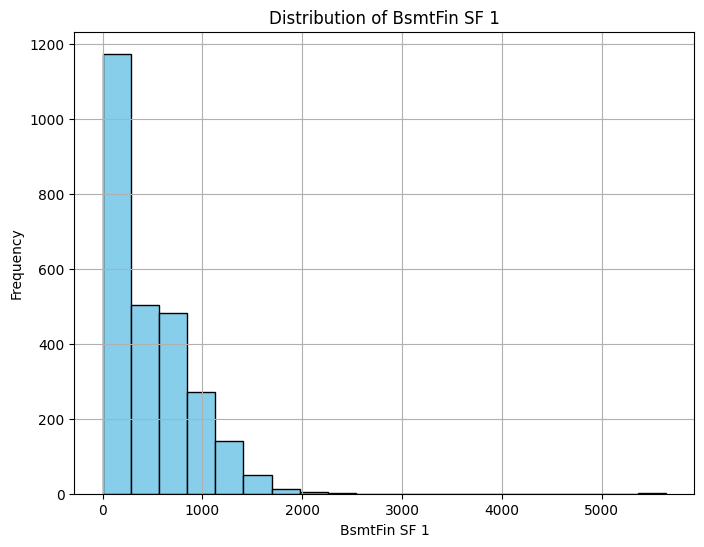

In [ ]:

# Plot histogram of 'BsmtFin SF 1'
plt.figure(figsize=(8, 6))
plt.hist(housing_good_numerical_data['BsmtFin SF 1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BsmtFin SF 1')
plt.xlabel('BsmtFin SF 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Impute zeros for BsmtFin SF 1

In [ ]:
# Filter for records where 'BsmtFin SF 1' is 0.0
zero_values_bsmtfin_sf1 = housing_good_numerical_data['BsmtFin SF 1'] == 0.0

# Calculate the median value for 'BsmtFin SF 1'
median_bsmtfin_sf1 = round(housing_good_numerical_data.loc[~zero_values_bsmtfin_sf1, 'BsmtFin SF 1'].median())

# Update the records with 0.0 with the median value
housing_good_numerical_data.loc[zero_values_bsmtfin_sf1, 'BsmtFin SF 1'] = median_bsmtfin_sf1

# Print the updated records
print("Updated records for 'BsmtFin SF 1':")
print(housing_good_numerical_data[zero_values_bsmtfin_sf1])


Updated records for 'BsmtFin SF 1':
      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1              90          72.0     10791             4             5   
2              50          50.0      9000             6             6   
7              50          66.0     21780             6             7   
10             20         129.0      9196             7             5   
13             20          80.0     10400             7             6   
...           ...           ...       ...           ...           ...   
2627           20         112.0     10859             5             5   
2628           60          75.0      9375             7             5   
2629           70          53.0      6720             6             7   
2632           50          52.0      6240             6             6   
2635           20          78.0     10140             6             5   

      Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  \
1        

In [ ]:
housing_good_numerical_data['BsmtFin SF 1'].value_counts()

602.0     846
24.0       23
16.0       12
300.0       8
936.0       7
         ... 
683.0       1
978.0       1
482.0       1
376.0       1
1098.0      1
Name: BsmtFin SF 1, Length: 935, dtype: int64

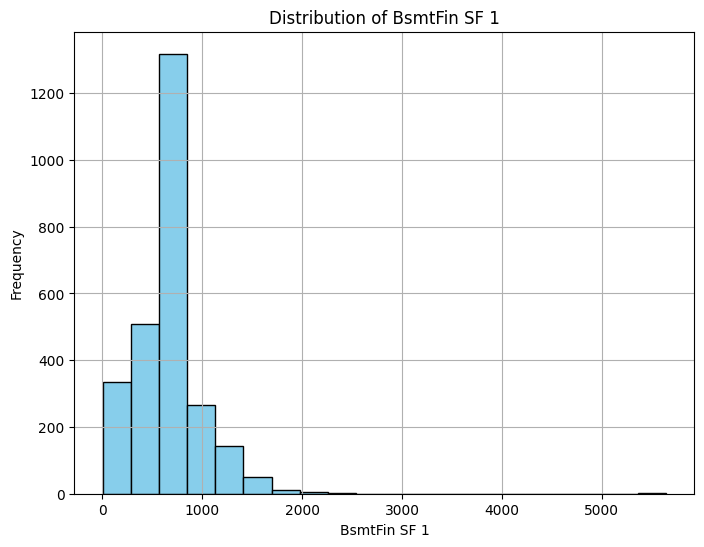

In [ ]:

# Plot histogram of 'BsmtFin SF 1'
plt.figure(figsize=(8, 6))
plt.hist(housing_good_numerical_data['BsmtFin SF 1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BsmtFin SF 1')
plt.xlabel('BsmtFin SF 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Impute- Bsmt Unf SF

In [ ]:
# Filter for null values before imputation
null_before = housing_good_numerical_data[housing_good_numerical_data['Bsmt Unf SF'].isnull()]

# Calculate the mean value for 'Bsmt Unf SF'
mean_bsmt_unf_sf = round(housing_good_numerical_data['Bsmt Unf SF'].mean())

# Fill null values for 'Bsmt Unf SF' with the mean
housing_good_numerical_data['Bsmt Unf SF'].fillna(mean_bsmt_unf_sf, inplace=True)

# Filter for null values after imputation
null_after = housing_good_numerical_data[housing_good_numerical_data['Bsmt Unf SF'].isnull()]

# Print imputed values
print("Imputed values:")
print(null_before)
print("Imputed with value:", mean_bsmt_unf_sf)
print(null_after)


Imputed values:
     MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
847           20          99.0      5940             4             7   

     Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  \
847        1946            1950         438.0          NaN            NaN   

     ...  Full Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  \
847  ...          1              2              1              4   

     Garage Yr Blt  Garage Cars  Garage Area  Mo Sold  Yr Sold  SalePrice  
847         1946.0          1.0        280.0        4     2008      79000  

[1 rows x 22 columns]
Imputed with value: 556
Empty DataFrame
Columns: [MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, BsmtFin SF 1, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Full Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Garage Yr Blt, Garage Cars, Garage Area, Mo Sold, Yr Sold, SalePrice]
Index: []

[0 rows x 22 columns]


In [ ]:
housing_good_numerical_data['Bsmt Unf SF'].isnull().sum()

0

In [ ]:
housing_good_numerical_data['Bsmt Unf SF'].value_counts()

0.0       219
384.0      18
728.0      13
600.0      12
672.0      11
         ... 
929.0       1
1721.0      1
1544.0      1
1497.0      1
1097.0      1
Name: Bsmt Unf SF, Length: 1080, dtype: int64

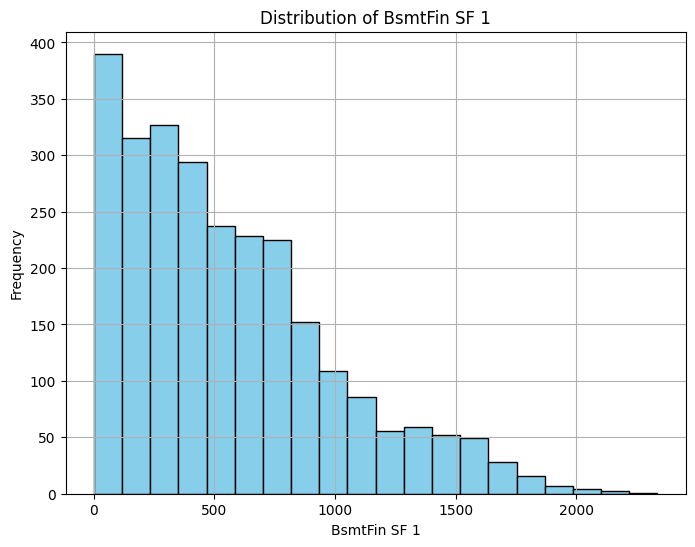

In [ ]:

# Plot histogram of 'Bsmt Unf SF'
plt.figure(figsize=(8, 6))
plt.hist(housing_good_numerical_data['Bsmt Unf SF'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BsmtFin SF 1')
plt.xlabel('BsmtFin SF 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Filter for records where 'Bsmt Unf SF' is 0.0
zero_values_bsmtfin_sf1 = housing_good_numerical_data['Bsmt Unf SF'] == 0.0

# Calculate the median value for 'Bsmt Unf SF'
median_bsmtfin_sf1 = round(housing_good_numerical_data.loc[~zero_values_bsmtfin_sf1, 'Bsmt Unf SF'].median())

# Update the records with 0.0 with the median value
housing_good_numerical_data.loc[zero_values_bsmtfin_sf1, 'Bsmt Unf SF'] = median_bsmtfin_sf1

# Print the updated records
print("Updated records for 'Bsmt Unf SF':")
print(housing_good_numerical_data[zero_values_bsmtfin_sf1])


Updated records for 'Bsmt Unf SF':
      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1              90          72.0     10791             4             5   
4              70          60.0      7200             7             9   
18             20          69.0     10368             6             6   
28             50          60.0     10800             5             6   
32            120          69.0      6820             8             5   
...           ...           ...       ...           ...           ...   
2535           90          74.0      6882             4             3   
2547           20          69.0      8339             5             7   
2591           50          70.0      6300             5             4   
2602           90          60.0      7200             5             5   
2624           20          60.0     10122             4             6   

      Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  \
1         

In [ ]:
housing_good_numerical_data['Bsmt Unf SF'].value_counts()

516.0     223
384.0      18
728.0      13
600.0      12
672.0      11
         ... 
929.0       1
1721.0      1
1544.0      1
1497.0      1
1097.0      1
Name: Bsmt Unf SF, Length: 1079, dtype: int64

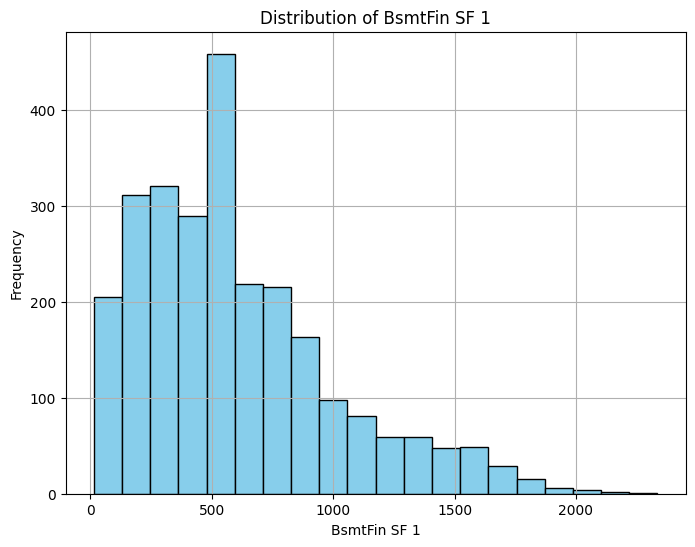

In [ ]:

# Plot histogram of 'Bsmt Unf SF'
plt.figure(figsize=(8, 6))
plt.hist(housing_good_numerical_data['Bsmt Unf SF'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BsmtFin SF 1')
plt.xlabel('BsmtFin SF 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Impute-Total Bsmt SF

In [ ]:
# Filter for null values before imputation for 'Total Bsmt SF'
null_before_total_bsmt_sf = housing_good_numerical_data[housing_good_numerical_data['Total Bsmt SF'].isnull()]

# Calculate the mean value for 'Total Bsmt SF'
mean_total_bsmt_sf = round(housing_good_numerical_data['Total Bsmt SF'].mean())

# Fill null values for 'Total Bsmt SF' with the mean
housing_good_numerical_data['Total Bsmt SF'].fillna(mean_total_bsmt_sf, inplace=True)

# Filter for null values after imputation for 'Total Bsmt SF'
null_after_total_bsmt_sf = housing_good_numerical_data[housing_good_numerical_data['Total Bsmt SF'].isnull()]

# Print imputed values for 'Total Bsmt SF'
print("\nImputed values for 'Total Bsmt SF':")
print(null_before_total_bsmt_sf)
print("Imputed with value:", mean_total_bsmt_sf)
print(null_after_total_bsmt_sf)



Imputed values for 'Total Bsmt SF':
     MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
847           20          99.0      5940             4             7   

     Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  \
847        1946            1950         438.0        556.0            NaN   

     ...  Full Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  \
847  ...          1              2              1              4   

     Garage Yr Blt  Garage Cars  Garage Area  Mo Sold  Yr Sold  SalePrice  
847         1946.0          1.0        280.0        4     2008      79000  

[1 rows x 22 columns]
Imputed with value: 1045
Empty DataFrame
Columns: [MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, BsmtFin SF 1, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Full Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Garage Yr Blt, Garage Cars, Garage Area, Mo Sold, Yr Sold, SalePrice]
Index: []

[0 

In [ ]:
housing_good_numerical_data['Total Bsmt SF'].isnull().sum()

0

In [ ]:
housing_good_numerical_data['Total Bsmt SF'].value_counts()

0.0       72
864.0     69
1040.0    24
768.0     24
672.0     23
          ..
1331.0     1
1978.0     1
1380.0     1
1385.0     1
1377.0     1
Name: Total Bsmt SF, Length: 1001, dtype: int64

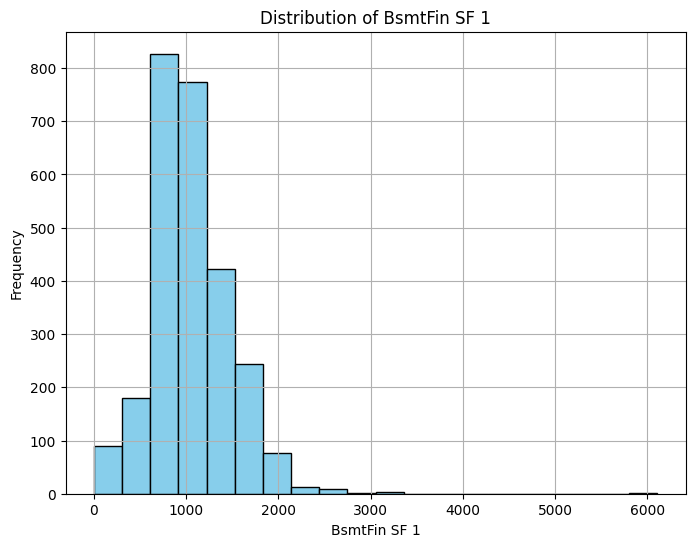

In [ ]:

# Plot histogram of 'Total Bsmt SF'
plt.figure(figsize=(8, 6))
plt.hist(housing_good_numerical_data['Total Bsmt SF'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BsmtFin SF 1')
plt.xlabel('BsmtFin SF 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Impute- Garage Yr Blt

In [ ]:
# Filter for null values before imputation
null_before = housing_good_numerical_data[housing_good_numerical_data['Garage Yr Blt'].isnull()]

# Calculate the mode value
mode_garage_yr_blt = housing_good_numerical_data['Garage Yr Blt'].mode()[0]

# Fill null values with the mode
housing_good_numerical_data['Garage Yr Blt'].fillna(mode_garage_yr_blt, inplace=True)

# Filter for null values after imputation
null_after = housing_good_numerical_data[housing_good_numerical_data['Garage Yr Blt'].isnull()]

# Print imputed values
print("Imputed values:")
print(null_before)
print("Imputed with value:", mode_garage_yr_blt)
print(null_after)


Imputed values:
      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
42             90         113.0      8513             5             5   
52             20          77.0      8335             5             5   
71             90          33.0      5976             5             7   
82             50          50.0      5925             3             6   
84             50          54.0      6342             5             8   
...           ...           ...       ...           ...           ...   
2556           20          74.0      7733             6             5   
2567          190          63.0      7627             4             6   
2603           30          67.0      8777             5             7   
2604           50          56.0     10134             5             5   
2608           50          60.0      9600             6             5   

      Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  \
42          1961            1

In [ ]:
housing_good_numerical_data['Garage Yr Blt'].isnull().sum()

0

In [ ]:
housing_good_numerical_data['Garage Yr Blt'].value_counts()

2005.0    276
2007.0    105
2006.0    100
2004.0     86
2003.0     84
         ... 
1908.0      1
1895.0      1
1917.0      1
2207.0      1
1896.0      1
Name: Garage Yr Blt, Length: 102, dtype: int64

Impute- Garage Cars

In [ ]:
# Filter for null values before imputation
null_before = housing_good_numerical_data[housing_good_numerical_data['Garage Cars'].isnull()]

# Calculate the mode value for 'Garage Cars'
mode_garage_cars = round(housing_good_numerical_data['Garage Cars'].mode())[0]

# Fill null values for 'Garage Cars' with the mode
housing_good_numerical_data['Garage Cars'].fillna(mode_garage_cars, inplace=True)

# Filter for null values after imputation
null_after = housing_good_numerical_data[housing_good_numerical_data['Garage Cars'].isnull()]

# Print imputed values
print("Imputed values:")
print(null_before)
print("Imputed with value:", mode_garage_cars)
print(null_after)


Imputed values:
     MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
329           70          50.0      9060             5             6   

     Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  \
329        1923            1999         548.0        311.0          859.0   

     ...  Full Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  \
329  ...          2              3              1              6   

     Garage Yr Blt  Garage Cars  Garage Area  Mo Sold  Yr Sold  SalePrice  
329         2005.0          NaN          NaN        3     2007     150909  

[1 rows x 22 columns]
Imputed with value: 2.0
Empty DataFrame
Columns: [MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, BsmtFin SF 1, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Full Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Garage Yr Blt, Garage Cars, Garage Area, Mo Sold, Yr Sold, SalePrice]
Index: []

[0 rows x 22 columns]


In [ ]:
housing_good_numerical_data['Garage Cars'].isnull().sum()

0

In [ ]:
housing_good_numerical_data['Garage Cars'].value_counts()

2.0    1450
1.0     696
3.0     331
0.0     145
4.0      14
5.0       1
Name: Garage Cars, dtype: int64

Impute- Garage Area

In [ ]:
# Filter for null values before imputation
null_before = housing_good_numerical_data[housing_good_numerical_data['Garage Area'].isnull()]

# Calculate the mean value for 'Garage Area'
mean_garage_area = round(housing_good_numerical_data['Garage Area'].mean())

# Fill null values for 'Garage Area' with the mean
housing_good_numerical_data['Garage Area'].fillna(mean_garage_area, inplace=True)

# Filter for null values after imputation
null_after = housing_good_numerical_data[housing_good_numerical_data['Garage Area'].isnull()]

# Print imputed values
print("Imputed values:")
print(null_before)
print("Imputed with value:", mean_garage_area)
print(null_after)


Imputed values:
     MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
329           70          50.0      9060             5             6   

     Year Built  Year Remod/Add  BsmtFin SF 1  Bsmt Unf SF  Total Bsmt SF  \
329        1923            1999         548.0        311.0          859.0   

     ...  Full Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  \
329  ...          2              3              1              6   

     Garage Yr Blt  Garage Cars  Garage Area  Mo Sold  Yr Sold  SalePrice  
329         2005.0          2.0          NaN        3     2007     150909  

[1 rows x 22 columns]
Imputed with value: 471
Empty DataFrame
Columns: [MS SubClass, Lot Frontage, Lot Area, Overall Qual, Overall Cond, Year Built, Year Remod/Add, BsmtFin SF 1, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Full Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Garage Yr Blt, Garage Cars, Garage Area, Mo Sold, Yr Sold, SalePrice]
Index: []

[0 rows x 22 columns]


In [ ]:
housing_good_numerical_data['Garage Area'].isnull().sum()

0

In [ ]:
housing_good_numerical_data['Garage Area'].value_counts()

0.0      145
576.0     91
440.0     89
484.0     71
240.0     59
        ... 
162.0      1
662.0      1
682.0      1
455.0      1
207.0      1
Name: Garage Area, Length: 576, dtype: int64

In [ ]:
trained_target_features = housing_good_numerical_data.copy()
trained_target_features

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Full Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Mo Sold,Yr Sold,SalePrice
0,20,62.0,14299,4,3,1964,1964,513.0,348.0,1005.0,...,1,3,1,5,1964.0,2.0,440.0,7,2007,115400
1,90,72.0,10791,4,5,1967,1967,602.0,516.0,0.0,...,2,2,2,6,1967.0,2.0,516.0,10,2006,90000
2,50,50.0,9000,6,6,1937,1950,602.0,780.0,780.0,...,1,3,1,6,1979.0,1.0,544.0,12,2007,141000
3,60,68.0,7379,8,5,2000,2000,484.0,491.0,975.0,...,2,3,1,7,2000.0,2.0,592.0,4,2010,254000
4,70,60.0,7200,7,9,1936,2007,350.0,516.0,560.0,...,1,3,1,6,1971.0,2.0,576.0,4,2009,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,50,52.0,6240,6,6,1934,1950,602.0,816.0,816.0,...,1,3,1,6,1985.0,2.0,528.0,9,2006,114500
2633,80,74.0,10778,7,6,1990,1991,460.0,308.0,1054.0,...,1,1,1,4,1990.0,2.0,462.0,7,2009,162000
2634,120,61.0,3782,8,5,1981,1981,960.0,266.0,1226.0,...,1,1,1,4,1981.0,2.0,484.0,9,2009,211500
2635,20,78.0,10140,6,5,1974,1974,602.0,1064.0,1064.0,...,2,3,1,7,1974.0,2.0,478.0,8,2009,165000


split into two data frame. those with and those without data types of object.

EDA

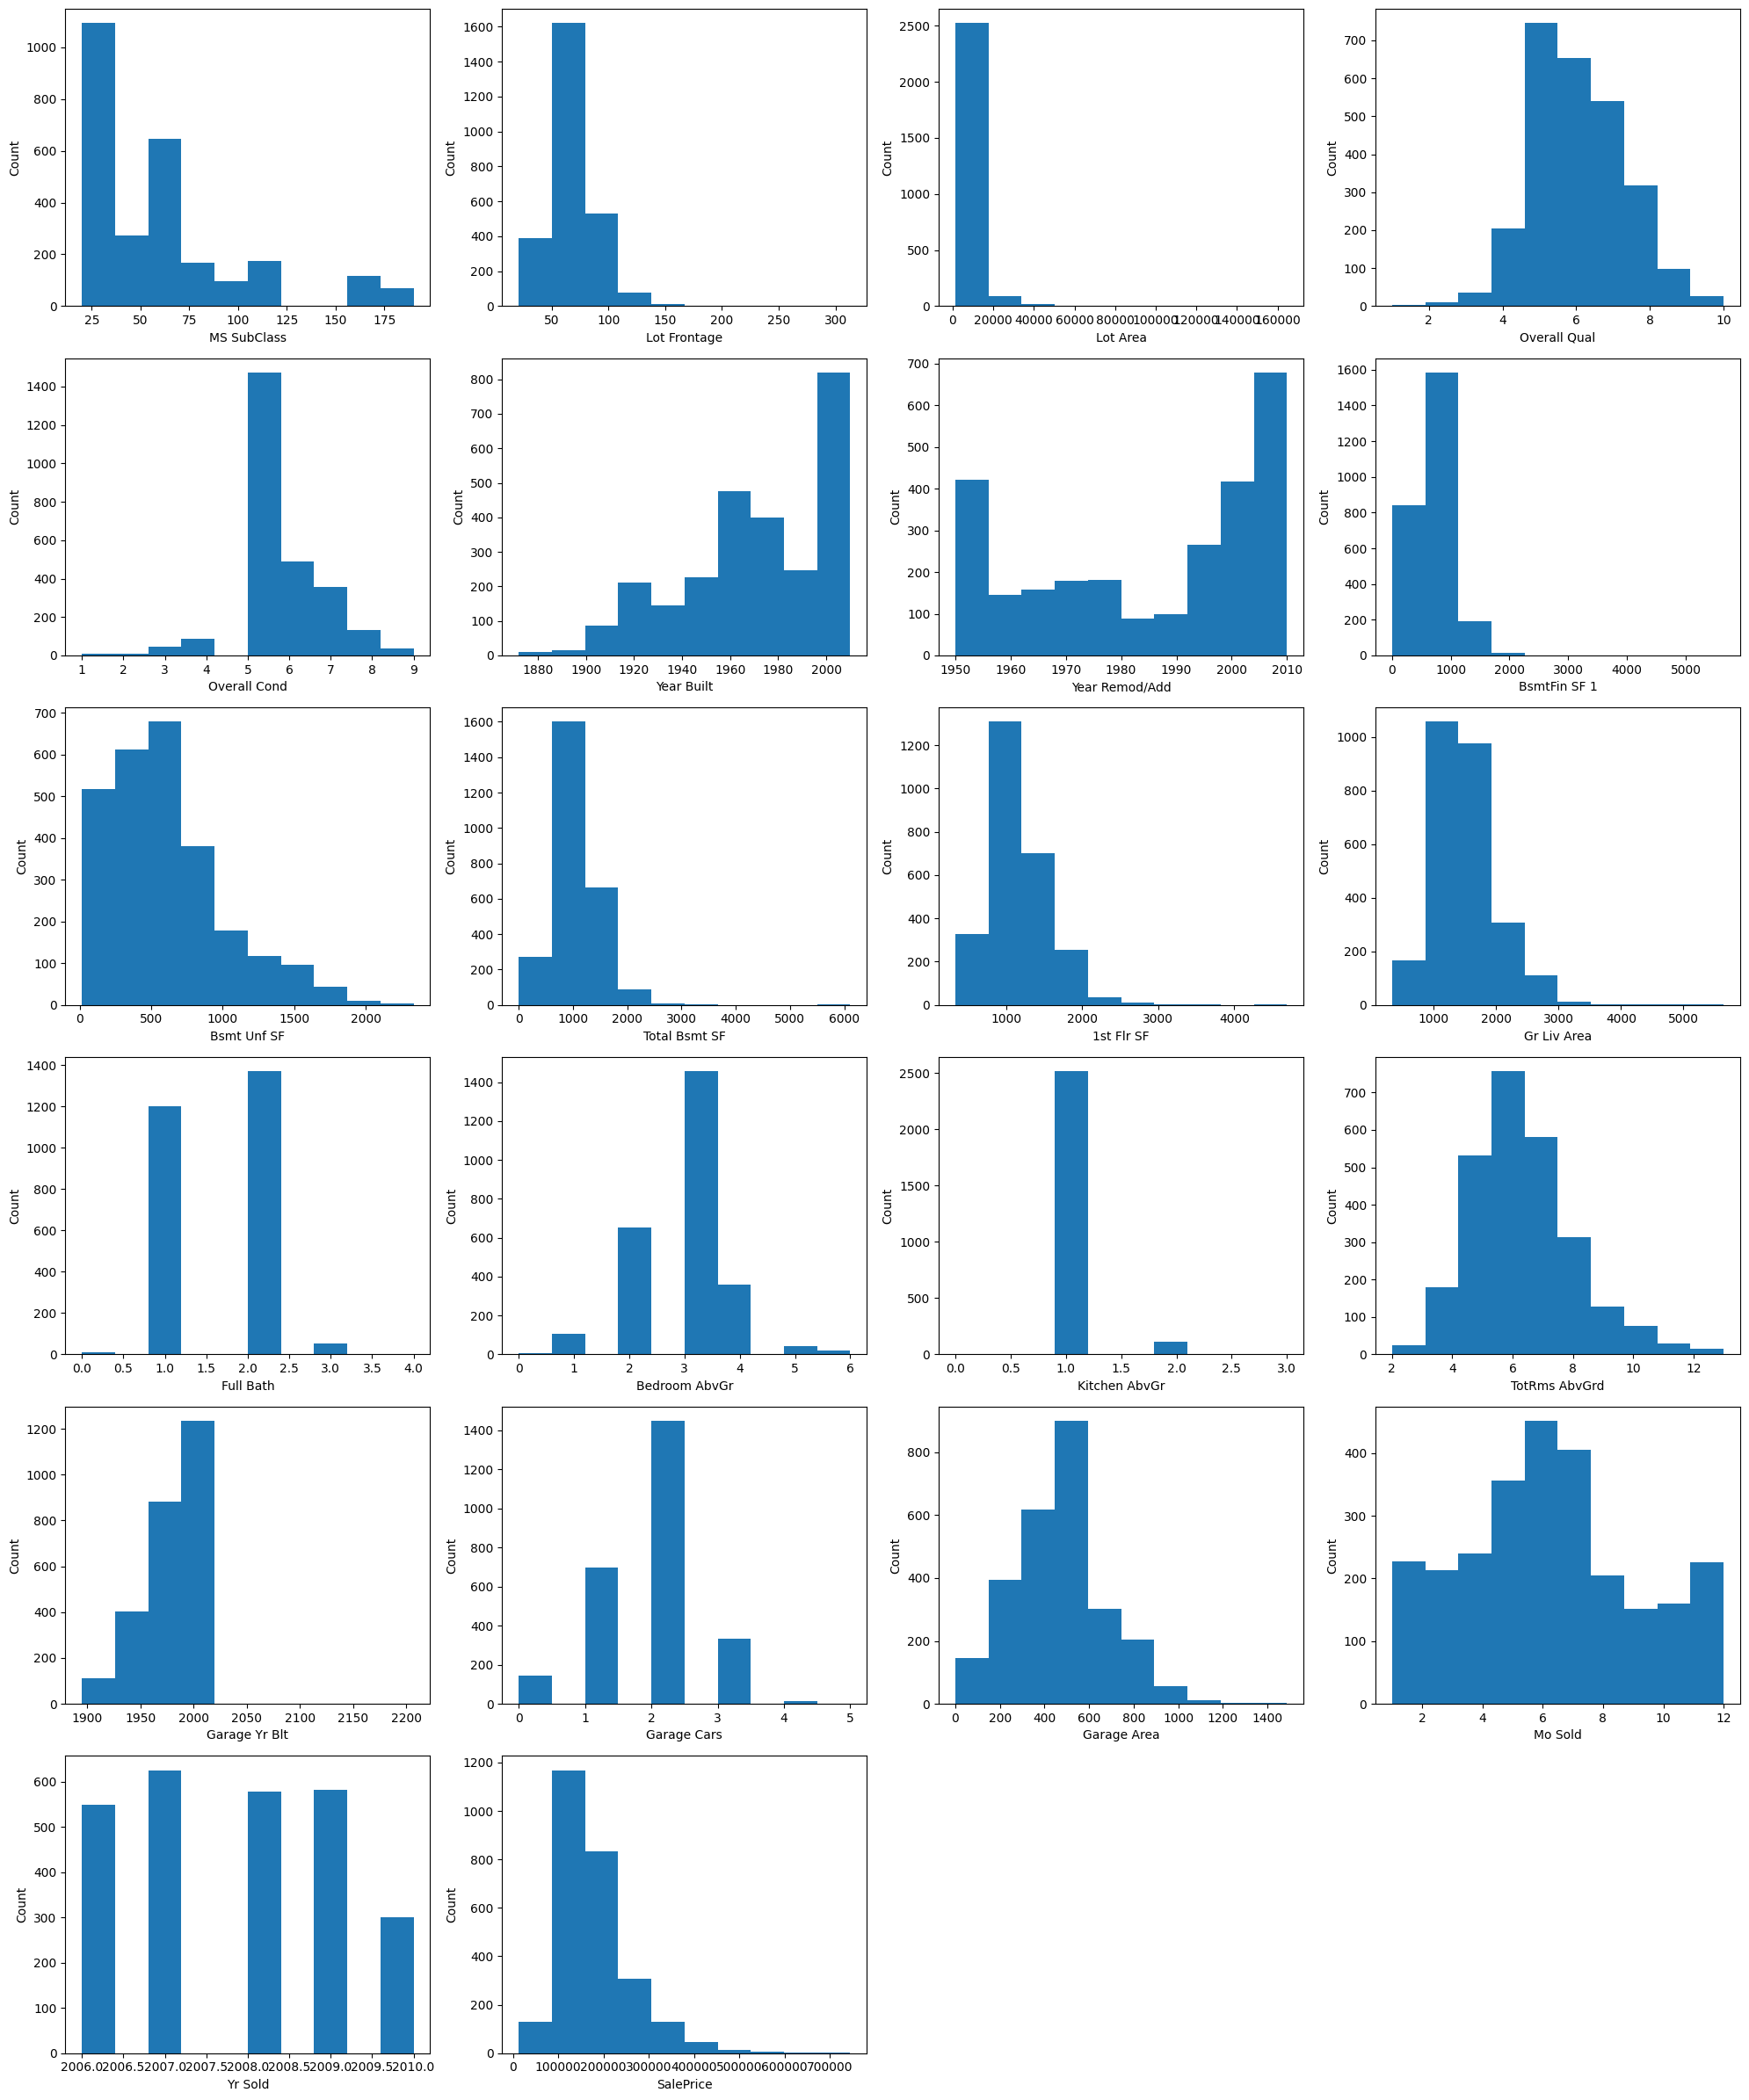

In [ ]:
# Create subplots
num_columns = 22
num_rows = (num_columns - 1) // 4 + 1  # Calculate number of rows needed
fig, axs = plt.subplots(num_rows, 4, figsize=(20, 4 * num_rows))

# Flatten axs if num_rows is 1
if num_rows == 1:
    axs = axs.reshape(1, -1)

column_names = trained_target_features.columns
n = 0
for i in range(num_rows):  # Loop through rows
    for j in range(4):  # Loop through columns
        if n < num_columns:
            axs[i, j].hist(trained_target_features[column_names[n]])
            axs[i, j].set_xlabel(column_names[n])
            axs[i, j].set_ylabel('Count')
            n += 1
        else:
            axs[i, j].remove()  # Remove empty subplots

plt.tight_layout()
plt.show()


<Axes: >

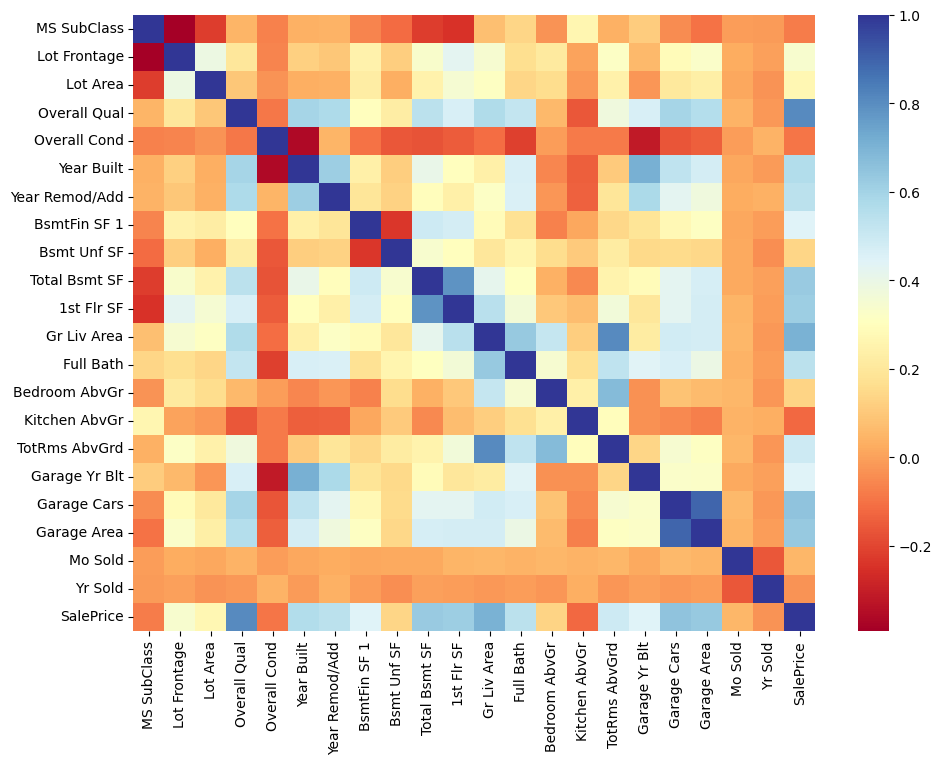

In [ ]:
# Calculate the width based on the number of columns
width = 0.5 * trained_target_features.shape[1]
corr = trained_target_features.corr()
# Set the figure size
plt.figure(figsize=(width, 8))

# Plot the heatmap
sns.heatmap(corr, cmap='RdYlBu', annot=False)


In [ ]:
corr_unstacked = corr.unstack()
corr_unstacked

MS SubClass  MS SubClass     1.000000
             Lot Frontage   -0.391894
             Lot Area       -0.220406
             Overall Qual    0.046362
             Overall Cond   -0.069494
                               ...   
SalePrice    Garage Cars     0.647151
             Garage Area     0.633883
             Mo Sold         0.052800
             Yr Sold        -0.030053
             SalePrice       1.000000
Length: 484, dtype: float64

In [ ]:
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self

MS SubClass  Lot Frontage    -0.391894
             Lot Area        -0.220406
             Overall Qual     0.046362
             Overall Cond    -0.069494
             Year Built       0.036241
                                ...   
SalePrice    Garage Yr Blt    0.440940
             Garage Cars      0.647151
             Garage Area      0.633883
             Mo Sold          0.052800
             Yr Sold         -0.030053
Length: 462, dtype: float64

In [ ]:
corr_unstacked_not_self['SalePrice'].abs().sort_values(ascending = False)

Overall Qual      0.805016
Gr Liv Area       0.705482
Garage Cars       0.647151
Garage Area       0.633883
Total Bsmt SF     0.628471
1st Flr SF        0.618247
Year Built        0.562777
Full Bath         0.542386
Year Remod/Add    0.539932
TotRms AbvGrd     0.493853
BsmtFin SF 1      0.444216
Garage Yr Blt     0.440940
Lot Frontage      0.340082
Lot Area          0.268516
Bsmt Unf SF       0.138594
Bedroom AbvGr     0.131789
Kitchen AbvGr     0.122953
Overall Cond      0.095205
MS SubClass       0.078857
Mo Sold           0.052800
Yr Sold           0.030053
dtype: float64

In [ ]:
filtered_records=corr_unstacked_not_self['SalePrice'].abs() >=.50

In [ ]:
filtered_records

MS SubClass       False
Lot Frontage      False
Lot Area          False
Overall Qual       True
Overall Cond      False
Year Built         True
Year Remod/Add     True
BsmtFin SF 1      False
Bsmt Unf SF       False
Total Bsmt SF      True
1st Flr SF         True
Gr Liv Area        True
Full Bath          True
Bedroom AbvGr     False
Kitchen AbvGr     False
TotRms AbvGrd     False
Garage Yr Blt     False
Garage Cars        True
Garage Area        True
Mo Sold           False
Yr Sold           False
dtype: bool

In [ ]:
type(filtered_records)

pandas.core.series.Series

In [ ]:
filtered_records[filtered_records == True]

Overall Qual      True
Year Built        True
Year Remod/Add    True
Total Bsmt SF     True
1st Flr SF        True
Gr Liv Area       True
Full Bath         True
Garage Cars       True
Garage Area       True
dtype: bool

In [ ]:
filtered_records.index[filtered_records == True]

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [114]:
columns_to_keep = filtered_records.index[filtered_records].tolist() + ['SalePrice']
train=trained_target_features[columns_to_keep].copy()

In [115]:
train.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Cars', 'Garage Area',
       'SalePrice'],
      dtype='object')

Scale- Robust Scaling before Training-


In [131]:
# Exclude the target column "SalePrice"
robust_features_scaled = train.drop(columns=['SalePrice'])

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the scaler to your DataFrame
training_preped_scaled = scaler.fit_transform(robust_features_scaled)

# Convert the scaled array back to a DataFrame with the original column names
trained_preped = pd.DataFrame(training_preped_scaled, columns=train_features.columns)

# Visualize the scaled DataFrame
print(trained_preped.head())


   Overall Qual  Year Built  Year Remod/Add  Total Bsmt SF  1st Flr SF  \
0          -1.0   -0.191489       -0.743590       0.034137   -0.153386   
1          -1.0   -0.127660       -0.666667      -1.983936    0.426295   
2           0.0   -0.765957       -1.102564      -0.417671   -0.601594   
3           1.0    0.574468        0.179487      -0.026104   -0.213147   
4           0.5   -0.787234        0.358974      -0.859438   -1.009960   

   Gr Liv Area  Full Bath  Garage Cars  Garage Area  
0    -0.712418       -1.0          0.0    -0.159363  
1    -0.236928        0.0          0.0     0.143426  
2    -0.107843       -1.0         -1.0     0.254980  
3     0.665033        0.0          0.0     0.446215  
4    -0.500000       -1.0          0.0     0.382470  


In [132]:
y = train['SalePrice'].copy()
X = trained_preped

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [134]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit1 = model.fit(X_train, y_train)

( myfit1.intercept_, myfit1.coef_ )


(174338.96154910632,
 array([40600.44951494, 11722.23133913, 13840.05828795, 10023.22110194,
         8566.02100323, 30980.76212454, -9105.29230039,  9109.02781045,
         3978.72271851]))

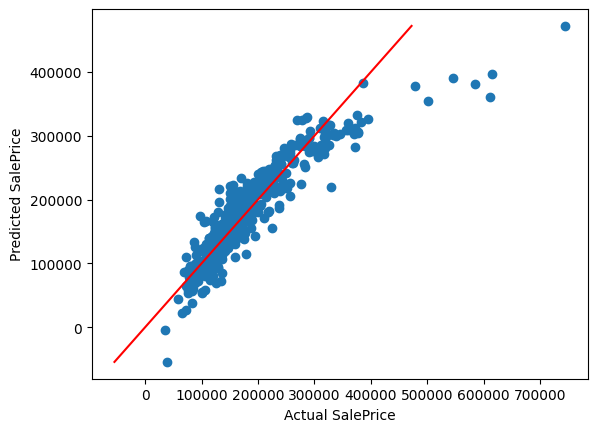

In [135]:
# See how well our model performs on our test data
y_pred = myfit1.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

In [136]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 35384.06704509384


In [137]:
# RMSPE
np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

20.949929961064612

In [150]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear-All'] = myfit1.coef_
model_results.sort_values(by=['Linear-All'],inplace=True, ascending=False)
model_results

,Predictor,Linear-All
0,Overall Qual,40600.449515
5,Gr Liv Area,30980.762125
2,Year Remod/Add,13840.058288
1,Year Built,11722.231339
3,Total Bsmt SF,10023.221102
7,Garage Cars,9109.027810
4,1st Flr SF,8566.021003
8,Garage Area,3978.722719
6,Full Bath,-9105.292300


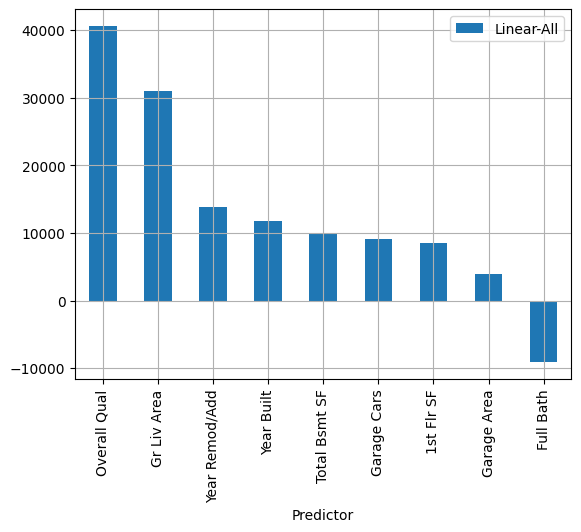

In [151]:
# We can even plot the coefficients if we want to!
model_results.plot(x = 'Predictor', y = 'Linear-All', kind = 'bar')
plt.grid()

In [152]:
# Use cross validation to assess model_1 performance
results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 20)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 34041.24081440961


Try different scaler method

In [153]:
scaler = StandardScaler()

In [154]:
standard_scaler = train.drop(columns=['SalePrice'])

In [155]:
# scale the features using the StandardScaler ( Z-score )
X_scaled = pd.DataFrame(scaler.fit_transform(standard_scaler), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

In [156]:
X_scaled

,Overall Qual,Year Built,Year Remod/Add,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area
0,-1.486237,-0.240538,-0.966224,-0.093543,-0.393454,-0.993677,-1.017589,0.311235,-0.145571
1,-1.486237,-0.141532,-0.822746,-2.433347,0.367281,-0.405936,0.800421,0.311235,0.211679
2,-0.069059,-1.131590,-1.635788,-0.617380,-0.981651,-0.246377,-1.017589,-1.004032,0.343298
3,1.348120,0.947533,0.755514,-0.163388,-0.471880,0.708955,0.800421,0.311235,0.568929
4,0.639531,-1.164592,1.090296,-1.129576,-1.517563,-0.731112,-1.017589,0.311235,0.493719
...,...,...,...,...,...,...,...,...,...
2632,-0.069059,-1.230596,-1.635788,-0.533566,-0.887539,-0.648303,-1.017589,0.311235,0.268087
2633,0.639531,0.617513,0.325079,0.020537,-0.247058,-0.880572,-1.017589,0.311235,-0.042156
2634,1.348120,0.320496,-0.153181,0.420981,0.184286,-0.547317,-1.017589,0.311235,0.061258
2635,-0.069059,0.089482,-0.487963,0.043818,0.508448,-0.296870,0.800421,0.311235,0.033054


In [157]:
X_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Overall Qual,2637.0,-2.162346e-16,1.00019,-3.612006,-0.777648,-0.069059,0.639531,2.765299
Year Built,2637.0,-2.214889e-15,1.00019,-3.276717,-0.570557,0.056480,0.980535,1.277552
Year Remod/Add,2637.0,2.690470e-15,1.00019,-1.635788,-0.918398,0.420731,0.946818,1.233774
Total Bsmt SF,2637.0,-2.593468e-16,1.00019,-2.433347,-0.589442,-0.133122,0.569983,11.791731
1st Flr SF,2637.0,1.192321e-16,1.00019,-2.147588,-0.725458,-0.192160,0.586874,9.245133
Gr Liv Area,2637.0,-9.296065e-17,1.00019,-2.348916,-0.745250,-0.113075,0.490824,8.371810
Full Bath,2637.0,1.801955e-16,1.00019,-2.835600,-1.017589,0.800421,0.800421,4.436442
Garage Cars,2637.0,-1.401146e-16,1.00019,-2.319299,-1.004032,0.311235,0.311235,4.257036
Garage Area,2637.0,-8.689800e-17,1.00019,-2.213860,-0.686146,0.042456,0.493719,4.780719


In [158]:
# Fit a linear model using Sklearn
model_2_scaled_data = LinearRegression()
model_2_scaled_data_fit = model_2_scaled_data.fit(X_train, y_train)

(
model_2_scaled_data.intercept_,
model_2_scaled_data.coef_
)

(179718.07491200053,
 array([28648.78418995,  7557.40718371,  7420.08498249,  8644.99021805,
         6527.32418552, 25063.82767215, -5008.38317288,  6925.61062652,
         3372.18443913]))

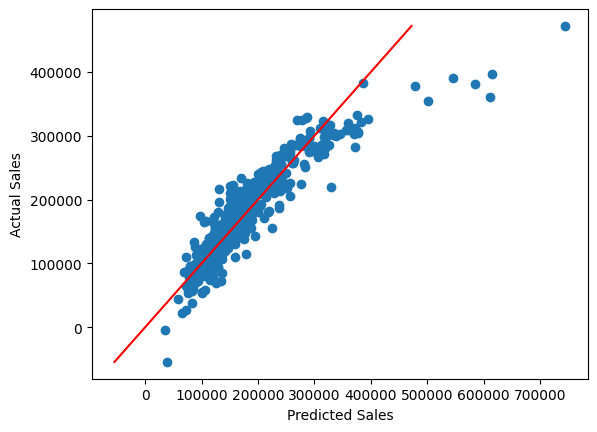

In [159]:
# See how well our model performs on our test data
y_pred = model_2_scaled_data_fit.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales') ;

In [160]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 35384.067045093834


In [161]:
# RMSPE
np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

20.949929961064658

In [162]:
model_results['Linear-re-Scaled'] = model_2_scaled_data_fit.coef_
model_results

,Predictor,Linear-All,Linear-re-Scaled
0,Overall Qual,40600.449515,28648.784190
5,Gr Liv Area,30980.762125,7557.407184
2,Year Remod/Add,13840.058288,7420.084982
1,Year Built,11722.231339,8644.990218
3,Total Bsmt SF,10023.221102,6527.324186
7,Garage Cars,9109.027810,25063.827672
4,1st Flr SF,8566.021003,-5008.383173
8,Garage Area,3978.722719,6925.610627
6,Full Bath,-9105.292300,3372.184439


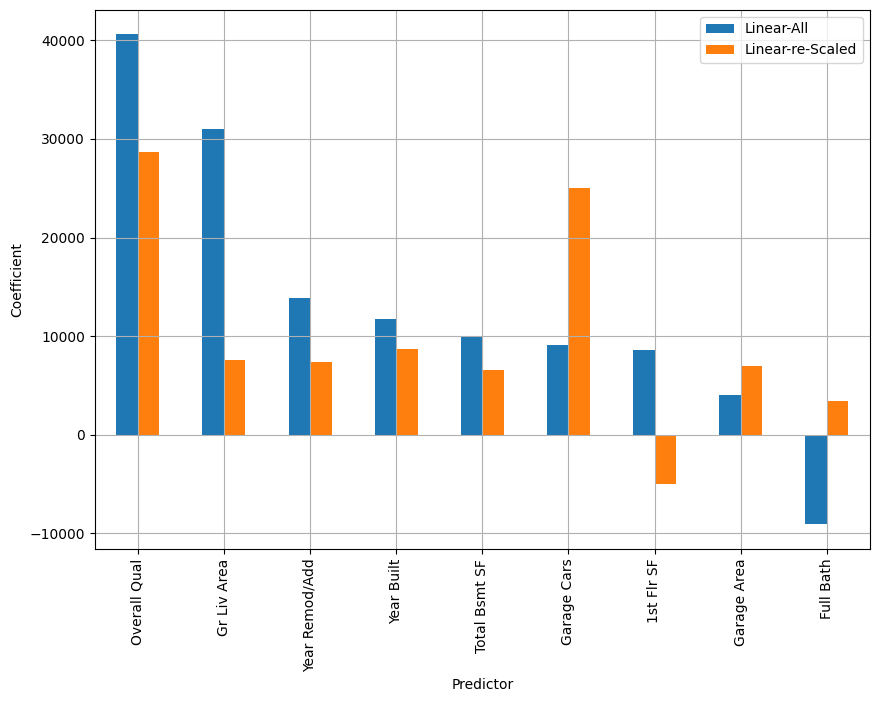

In [163]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (10,7))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coefficient')
plt.grid()

In [164]:
# Use cross validation to assess model performance - scaled
results = cross_val_score(model_2_scaled_data, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 20)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 34041.24081440961


<Axes: >

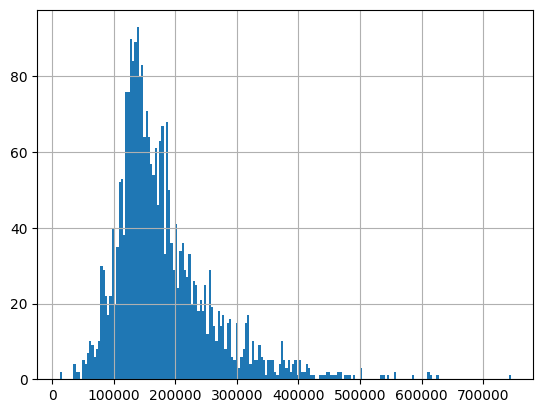

In [165]:
train_target_split.hist(bins=200)

In [ ]:
housing_and_price = pd.concat([housing_good_numerical_data[columns_to_keep], housing_good_numerical_data['SalePrice']], axis=1)
housing_and_price

In [ ]:
filter_100k = (housing_and_price['SalePrice'] >= 100000)
filter_400k = (housing_and_price['SalePrice'] <= 400000)
hdata_price_100_400 = housing_and_price[filter_100k & filter_400k]
hdata_price_100_400.shape
hdata_price_100_400

In [ ]:
hdata_price_100_400['SalePrice'].hist(bins=200)

In [ ]:
final_column_selection = [
  'SalePrice',
  'Overall Qual',
  'Gr Liv Area',
  'Garage Cars',
  'Total Bsmt SF',
  'Year Built',
  'Full Bath',
  'Year Remod/Add',
]

In [ ]:
train_100_400 = hdata_price_100_400[final_column_selection].copy()
train_100_400.shape
y = train_100_400['SalePrice'].copy()
X = train_100_400.drop('SalePrice', axis=1, inplace=False)

In [ ]:
y.head()

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
model_3 = LinearRegression()
model_3 = model_3.fit(X_train, y_train)

( model_3.intercept_, model_3_fit.coef_ )

(-1264098.8029313483,
 array([ 17775.75022376,     53.27217547,  10418.19133591,     35.70748088,
           268.43070567, -10504.20217065,    345.40846045]))